In [0]:
import pandas as pd
import numpy as np
import glob
import re

In [0]:
#upload all the  files into google colab 
path = r'/content' # use your path
all_files = glob.glob("*.csv")

print(all_files)

li = []

filename = "/*.csv"

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data

['B_2019-10-30.csv', 'B_2019-10-25.csv', 'B_2019-10-26.csv', 'B_2019-10-12.csv', 'B_2019-10-17.csv', 'B_2019-10-27.csv', 'B_2019-10-06.csv', 'B_2019-10-10.csv', 'B_2019-10-04.csv', 'B_2019-10-28.csv', 'B_2019-09-25.csv', 'B_2019-10-09.csv', 'B_2019-10-03.csv', 'B_2019-09-28.csv', 'B_2019-10-11.csv', 'B_2019-10-20.csv', 'B_2019-09-29.csv', 'B_2019-10-22.csv', 'B_2019-10-14.csv', 'B_2019-10-05.csv', 'B_2019-09-24.csv', 'B_2019-10-07.csv', 'B_2019-10-19.csv', 'B_2019-10-21.csv', 'B_2019-10-29.csv', 'B_2019-09-30.csv', 'B_2019-10-02.csv', 'B_2019-09-27.csv', 'B_2019-10-23.csv', 'B_2019-10-08.csv', 'B_2019-10-01.csv', 'B_2019-10-13.csv', 'B_2019-09-26.csv']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AFIS_Tran,Address,Bed,Bond_Amount,Bond_Details,Bond_Status,Bond_Type,Bonds,Booking_Date,Booking_Number,Booking_Time,Build,Building,COB,Cell,Charges,Citizenship_Status,County,Court_Details,DOB,Detainers,Eye_Color,FBI,Facility_Name,Hair_Color,Height,INS,Inmate_ID,Inmate_ID_Alternate,Jacket_Number,Jail_ID,KOMS,Location,Name,Nationality,Phone_Number,Pod,Race,Release_Date,Release_Time,Scrape_Date,Sex,Skin_Tone,State,State_Code,Tomis,Weight
0,None,None,3,0.0,0.0,NO BOND,NO BAIL,"[{'Bond_Type': 'NO BAIL', 'Bond_Details': '0',...",2019-06-25,2019002680,11:39,Small,None,None,1,NaN,True,Cumberland,[],None,[],None,None,Cumberland Co. Jail,None,"""",None,None,None,63163.0,1902,None,None,JUAN AFANADOR,United States,(856) 575-7726,B_DORM,None,None,None,2019-10-30,M,Light,NJ,31,None,None
1,None,None,2,0.0,0.0,SENTENCED,NO BAIL,"[{'Bond_Type': 'NO BAIL', 'Bond_Details': '0',...",2019-07-26,2019003127,13:19,Slender,None,None,5012,NaN,False,Cumberland,[],None,[],None,None,Cumberland Co. Jail,None,"""",None,None,None,40621.0,1902,None,None,MANUEL ALCAZAR-CRUZ,None,None,C_POD,None,None,None,2019-10-30,M,Fair,NJ,31,None,None
2,None,None,17,0.0,0.0,NO BOND,NO BAIL,"[{'Bond_Type': 'NO BAIL', 'Bond_Details': '0.0...",2019-05-14,2019002065,19:36,Slender,None,None,1,NaN,True,Cumberland,[],None,[],None,None,Cumberland Co. Jail,None,"""",None,None,None,86599.0,1902,None,None,TAYVAHN ALICEA,United States,None,D_DORM,None,None,None,2019-10-30,M,Dark,NJ,31,None,None
3,None,None,17,1001.0,1001.0,RELEASED,CASH 10 %,"[{'Bond_Type': 'NO BAIL', 'Bond_Details': '0.0...",2019-05-14,2019002065,19:36,Slender,None,None,1,NaN,True,Cumberland,[],None,[],None,None,Cumberland Co. Jail,None,"""",None,None,None,86599.0,1902,None,None,TAYVAHN ALICEA,United States,None,D_DORM,None,None,None,2019-10-30,M,Dark,NJ,31,None,None
4,None,None,17,0.0,0.0,NO BOND,NO BAIL,"[{'Bond_Type': 'NO BAIL', 'Bond_Details': '0.0...",2019-05-14,2019002065,19:36,Slender,None,None,1,NaN,True,Cumberland,[],None,[],None,None,Cumberland Co. Jail,None,"""",None,None,None,86599.0,1902,None,None,TAYVAHN ALICEA,United States,None,D_DORM,None,None,None,2019-10-30,M,Dark,NJ,31,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23840,NaN,NaN,1,0.0,0.0,SENTENCED,NO BAIL,NaN,2019-07-25,2019003117,19:31,Large,NaN,NaN,1,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,Cumberland,NaN,None,NaN,None,NaN,Cumberland Co. Jail,None,"""",NaN,NaN,NaN,86158.0,1902,NaN,NaN,KVAUGHN WYNDER,United States,(856) 391-5275,A_DORM,None,None,None,2019-09-26,M,Dark,NJ,31,NaN,None
23841,NaN,NaN,1,0.0,0.0,SENTENCED,NO BAIL,NaN,2019-07-25,2019003117,19:31,Large,NaN,NaN,1,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,Cumberland,NaN,None,NaN,None,NaN,Cumberland Co. Jail,None,"""",NaN,NaN,NaN,86158.0,1902,NaN,NaN,KVAUGHN WYNDER,United States,(856) 391-5275,A_DORM,None,None,None,2019-09-26,M,Dark,NJ,31,NaN,None
23842,NaN,NaN,1,0.0,0.0,SENTENCED,NO BAIL,NaN,2019-07-25,2019003117,19:31,Large,NaN,NaN,1,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,Cumberland,NaN,None,NaN,None,NaN,Cumberland Co. Jail,None,"""",NaN,NaN,NaN,86158.0,1902,NaN,NaN,KVAUGHN WYNDER,United States,(856) 391-5275,A_DORM,None,None,None,2019-09-26,M,Dark,NJ,31,NaN,None
23843,NaN,NaN,1,0.0,0.0,SENTENCED,NO BAIL,NaN,2019-07-25,2019003117,19:31,Large,NaN,NaN,1,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,Cumberland,NaN,None,NaN,None,NaN,Cumberland Co. Jail,None,"""",NaN,NaN,NaN,86158.0,1902,NaN,NaN,KVAUGHN WYNDER,United States,(856) 391-5275,A_DORM,None,None,None,2019-09-26,M,Dark,NJ,31,NaN,None


In [0]:
#dropping duplicate rows
data.drop_duplicates(keep='first', inplace=True)


In [0]:
#columns to drop
to_drop = ['Scrape_Date',
           'State',
           'County',
           'Facility_Name',
           'State_Code',
           'Jail_ID',
            'DOB',
           'Height',
           'Weight',
           'Race',
           'Hair_Color',
           'Eye_Color',
           'Detainers',
           'Building',
           'Pod',
           'Cell',
           'Bed',
           'Release_Date',
           'Release_Time',
           'Location',
           'Booking_Number',
           'COB',
           'FBI',
           'Inmate_ID',
           'Inmate_ID_Alternate',
           'INS',
           'KOMS',
           'Tomis',
           'AFIS_Tran',
           'Address',
           'Phone_Number',
           'Booking_Date',
           'Booking_Time',
           'Jacket_Number',
           'Court_Details',
           'Bond_Details',
           'Build',
           'Bond_Type',
           'Bonds'
           ]

data.drop(to_drop, inplace=True, axis=1)


In [0]:
data

,Bond_Amount,Bond_Status,Charges,Citizenship_Status,Name,Nationality,Sex,Skin_Tone
0,0.0,NO BOND,NaN,True,JUAN AFANADOR,United States,M,Light
1,0.0,SENTENCED,NaN,False,MANUEL ALCAZAR-CRUZ,None,M,Fair
2,0.0,NO BOND,NaN,True,TAYVAHN ALICEA,United States,M,Dark
3,1001.0,RELEASED,NaN,True,TAYVAHN ALICEA,United States,M,Dark
5,0.0,NO BOND,NaN,True,LAQUAN ALLEN,United States,M,Brown
...,...,...,...,...,...,...,...,...
23836,0.0,NO BOND,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,SHANE WILSON,None,M,Light
23837,0.0,RELEASED,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,Dark
23838,0.0,OPEN,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,Dark
23839,0.0,SENTENCED,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,Dark


In [0]:
#drop rows with OPEN bond status
indexNames = data[ data['Bond_Status'] == 'OPEN' ].index
print(indexNames)
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

Int64Index([    8,    16,    26,    28,    41,    42,    52,    57,    63,
               67,
            ...
            23755, 23768, 23772, 23776, 23777, 23778, 23788, 23825, 23826,
            23838],
           dtype='int64', length=3942)


In [0]:
#drop rows with null charges
data = data[pd.notnull(data['Charges'])]

In [0]:
#drop rows with null skin tones
data = data[pd.notnull(data['Skin_Tone'])]

In [0]:
#set white to 1 and non white to 0
data["Skin_Tone"]= data["Skin_Tone"].replace(['Light', "Fair", "ruddy"], 1)
data["Skin_Tone"]= data["Skin_Tone"].replace(['Dark', "Medium", "Black", "Brown", "Olive"], 0)


In [0]:
#drop Bond Status column
data.drop("Bond_Status", inplace=True, axis=1)

In [0]:
data

,Bond_Amount,Charges,Citizenship_Status,Name,Nationality,Sex,Skin_Tone
2126,0.0,"[{'Charge_Code': '2C:12-3B', 'Charge': 'TERROR...",True,JUAN AFANADOR,United States,M,1
2128,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,JOSE ALBINO PEREZ,United States,M,0
2130,0.0,"[{'Charge_Code': '2C:40-26B', 'Charge': 'OPERA...",False,MANUEL ALCAZAR-CRUZ,None,M,1
2131,NaN,"[{'Charge_Code': '39:3-40', 'Charge': 'DRIVING...",True,DANIEL ALICEA,United States,M,1
2132,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,TAYVAHN ALICEA,United States,M,0
...,...,...,...,...,...,...,...
23835,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,SHANE WILSON,None,M,1
23836,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,SHANE WILSON,None,M,1
23837,0.0,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,0
23839,0.0,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,0


In [0]:
# potential categories: terrorist threats, contempt, possesion of weapon, damage of property, burglary,  theft, obstruction,  marijuana possession, distrubution CDS, conspiracy, murder, witness tampering, HINDERING-ONESELF-HIDE/SUPPR INFO/EVIDENCE, ESIST ARR/ELUD-PREVENTS OFFICER FROM EFFECTING ARREST', WANDERING/PROWLING TO OBTAIN/SELL CDS,  CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT, sexual assault, possesion of drugs, POSS CDS/ANALOG - SCHD I II III IV, POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,  OPERATE MV DURING LICENSE SUSPENSION,  ENDANGERING-SEXUAL CONDUCT WITH CHILD

In [0]:
#get list of charges
charges = data['Charges']
charges = charges.tolist()

In [0]:
#categories of charges we'll be dealing with
categories = ["terroristic threat", "contempt", "possession of weapon", "damage property", "burglary",  "theft", "obstructing",  "marij", "distrIbute", "conspiracy", "murder", "witness tampering", "HINDERING-ONESELF", "RESIST ARR", "WANDERING/PROWLING TO OBTAIN/SELL CDS",  "CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT", "sexual assault", "drug", "POSS CDS/ANALOG - SCHD I II III IV", "POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS",  "OPERATE MV DURING LICENSE SUSPENSION",  "ENDANGERING-SEXUAL CONDUCT WITH CHILD", "shoplifting", "DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED" ]
categories = [x.upper() for x in categories]

In [0]:
#create new columns of categories in dataframe and set to zero
for i in categories:
  data[i] = 0

In [0]:
data

,Bond_Amount,Charges,Citizenship_Status,Name,Nationality,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2126,0.0,"[{'Charge_Code': '2C:12-3B', 'Charge': 'TERROR...",True,JUAN AFANADOR,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2128,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,JOSE ALBINO PEREZ,United States,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2130,0.0,"[{'Charge_Code': '2C:40-26B', 'Charge': 'OPERA...",False,MANUEL ALCAZAR-CRUZ,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2131,NaN,"[{'Charge_Code': '39:3-40', 'Charge': 'DRIVING...",True,DANIEL ALICEA,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2132,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,TAYVAHN ALICEA,United States,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,SHANE WILSON,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23836,0.0,"[{'Charge_Code': '2A:10-1(C)', 'Charge': 'CONT...",True,SHANE WILSON,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23837,0.0,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23839,0.0,"[{'Charge_Code': '2C:29-9', 'Charge': 'CONTEMP...",True,KVAUGHN WYNDER,United States,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#set categories that appear in inmate charge to 1
for i in range(len(charges)):
  for j in range(len(categories)):
    pattern = str(categories[j])
    text = str(charges[i])
    contains = re.search(pattern, text)
    if contains:
      data.iat[i, j + 5] = 1


In [0]:
#drop columns
data.drop("Charges", inplace=True, axis=1)
data.drop("Name", inplace=True, axis=1)

In [0]:
#deleting nan values
data=data.dropna()
data.head(50)

,Bond_Amount,Citizenship_Status,Nationality,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2126,0.00,True,United States,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2128,0.00,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2130,0.00,False,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2132,0.00,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2133,1001.00,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2135,0.00,True,United States,M,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2137,12699.54,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2139,0.00,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2140,0.00,False,None,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2141,0.00,True,United States,M,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0


In [0]:
###ANALYSIS AND PREDICTION MODEL


In [0]:
#list of all the charges
col=data.columns.tolist()
col=col[5:]

In [0]:
#top charges for men and women
men=[]
women=[]
female=data[ data['Sex'] == 'F' ]
male=data[ data['Sex'] == 'M' ]

for i in col:
  men.append(male[i].sum(axis=0))
  women.append(female[i].sum(axis=0))

print(men)
print(women)

[121, 523, 563, 754, 918, 833, 336, 629, 753, 137, 503, 872, 335, 463, 359, 1565, 1488, 71, 391, 357, 1131, 855, 0, 0]
[0, 18, 38, 52, 26, 22, 0, 88, 83, 0, 64, 26, 2, 32, 0, 205, 48, 0, 0, 0, 43, 133, 0, 0]


In [0]:
#top charges for men and women
topwomen=[]
topmen=[]
N=5
rmen = sorted(range(len(men)), key = lambda sub: men[sub])[-N:]
rwomen=sorted(range(len(women)), key = lambda sub: women[sub])[-N:]

for i in range(N):
  topwomen.append(col[rwomen[i]])
  topmen.append(col[rmen[i]])

print(topmen, topwomen)

['WITNESS TAMPERING', 'BURGLARY', 'OPERATE MV DURING LICENSE SUSPENSION', 'SEXUAL ASSAULT', 'CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT'] ['MURDER', 'DISTRIBUTE', 'MARIJ', 'ENDANGERING-SEXUAL CONDUCT WITH CHILD', 'CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT']


In [0]:
#average bail for men/women

In [0]:
ftotal=0
fnumbail=0
fsumbail=0
fbonds=female['Bond_Amount'].tolist()
for i in range(len(fbonds)):
  if fbonds[i]> 0:
    fnumbail+=1
    fsumbail=fsumbail+fbonds[i]
  ftotal+=1


mtotal=0
mnumbail=0
msumbail=0 
mbonds=male['Bond_Amount'].tolist()
for i in range(len(mbonds)):
  if mbonds[i]> 0:
    mnumbail+=1
    msumbail=msumbail+mbonds[i]
  mtotal+=1

In [0]:
favbond=fsumbail/fnumbail
fbondper=fnumbail/ftotal

mavbond=msumbail/mnumbail
mbondper=mnumbail/mtotal

print(favbond, fbondper)
print(mavbond, mbondper)
print(ftotal)
print(mtotal)

1736.0404843304843 0.32742537313432835
17124.710259875275 0.23589995095635116
1072
8156


In [0]:
#top for white & non white

In [0]:
white=data[ data['Skin_Tone'] == 1 ]
nonwhite=data[ data['Skin_Tone'] == 0 ]
nonwhite

,Bond_Amount,Citizenship_Status,Nationality,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2135,0.0,True,United States,M,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2140,0.0,False,None,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2150,0.0,True,United States,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2158,0.0,False,None,M,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2159,0.0,True,United States,M,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23782,0.0,True,United States,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23784,0.0,True,United States,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23822,0.0,False,None,M,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23824,0.0,True,United States,M,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


In [0]:
w=[]
n=[]
for i in col:
  w.append(white[i].sum(axis=0))
  n.append(nonwhite[i].sum(axis=0))

In [0]:
topwhite=[]
topnonwhite=[]
N=5
rwhite = sorted(range(len(w)), key = lambda sub: w[sub])[-N:]
rnonwhite=sorted(range(len(n)), key = lambda sub: n[sub])[-N:]

for i in range(N):
  topwhite.append(col[rwhite[i]])
  topnonwhite.append(col[rnonwhite[i]])

print(topnonwhite, topwhite)

['CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT', 'BURGLARY', 'MARIJ', 'SEXUAL ASSAULT', 'DISTRIBUTE'] ['WITNESS TAMPERING', 'ENDANGERING-SEXUAL CONDUCT WITH CHILD', 'OPERATE MV DURING LICENSE SUSPENSION', 'SEXUAL ASSAULT', 'CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT']


In [0]:
#average bail/no bail % and amount for whitw & non white

In [0]:
wtotal=0
wnumbail=0
wsumbail=0
wbonds=white['Bond_Amount'].tolist()
for i in range(len(wbonds)):
  if wbonds[i]> 0:
    wnumbail+=1
    wsumbail=wsumbail+wbonds[i]
  wtotal+=1


ntotal=0
nnumbail=0
nsumbail=0 
nbonds=nonwhite['Bond_Amount'].tolist()
for i in range(len(nbonds)):
  if nbonds[i] > 0:
    nnumbail+=1
    nsumbail=nsumbail+nbonds[i]
  ntotal+=1

In [0]:
wavbond=wsumbail/wnumbail
wbondper=wnumbail/wtotal

navbond=nsumbail/nnumbail
nbondper=nnumbail/ntotal

print(wavbond, wbondper)
print(navbond, nbondper)

5589.950285178225 0.32941903584672433
333868.9736842105 0.03308663474096648


In [0]:
print(ntotal, wtotal)

2297 8090


In [0]:
#top depending on the citizenship status

In [0]:
citizenyes=data[ data['Citizenship_Status'] == True ]
citizenno=data[ data['Citizenship_Status'] == False ]

In [0]:
cy=[]
cn=[]
for i in col:
  cy.append(citizenyes[i].sum(axis=0))
  cn.append(citizenno[i].sum(axis=0))

In [0]:
topcy=[]
topcn=[]
N=5
rcy = sorted(range(len(cy)), key = lambda sub: cy[sub])[-N:]
rcn=sorted(range(len(cn)), key = lambda sub: cn[sub])[-N:]

for i in range(N):
  topcy.append(col[rcy[i]])
  topcn.append(col[rcn[i]])

print(topcy, topcn)

['OPERATE MV DURING LICENSE SUSPENSION', 'WITNESS TAMPERING', 'ENDANGERING-SEXUAL CONDUCT WITH CHILD', 'SEXUAL ASSAULT', 'CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT'] ['OPERATE MV DURING LICENSE SUSPENSION', 'MARIJ', 'SEXUAL ASSAULT', 'DISTRIBUTE', 'CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT']


In [0]:
##bail info citizenship status
cytotal=0
cynumbail=0
cysumbail=0
cybonds=citizenyes['Bond_Amount'].tolist()
for i in range(len(cybonds)):
  if cybonds[i]> 0:
    cynumbail+=1
    cysumbail=cysumbail+cybonds[i]
  cytotal+=1


cntotal=0
cnnumbail=0
cnsumbail=0 
cnbonds=citizenno['Bond_Amount'].tolist()
for i in range(len(cnbonds)):
  if cnbonds[i] > 0:
    cnnumbail+=1
    cnsumbail=cnsumbail+cnbonds[i]
  cntotal+=1

In [0]:
cyavbond=cysumbail/cynumbail
cybondper=cynumbail/cytotal

cnavbond=cnsumbail/cnnumbail
cnbondper=cnnumbail/cntotal

print(cyavbond, cybondper)
print(cnavbond, cnbondper)

6348.407792977649 0.2720506140677335
48082.48397810217 0.235597592433362


In [0]:
################################################################################
# find the most applicable population group for each charge
cols=col[:-2]
print(cols)

['TERRORISTIC THREAT', 'CONTEMPT', 'POSSESSION OF WEAPON', 'DAMAGE PROPERTY', 'BURGLARY', 'THEFT', 'OBSTRUCTING', 'MARIJ', 'DISTRIBUTE', 'CONSPIRACY', 'MURDER', 'WITNESS TAMPERING', 'HINDERING-ONESELF', 'RESIST ARR', 'WANDERING/PROWLING TO OBTAIN/SELL CDS', 'CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT', 'SEXUAL ASSAULT', 'DRUG', 'POSS CDS/ANALOG - SCHD I II III IV', 'POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS', 'OPERATE MV DURING LICENSE SUSPENSION', 'ENDANGERING-SEXUAL CONDUCT WITH CHILD']


In [0]:
stats=pd.DataFrame(columns=['variable', '% awarded bail', 'average bail', 'top 5 charges'])
var=['White', 'Nonwhite', 'Male', 'Female', 'Citizenship True', 'Citizenship False']
stats['variable']=var

In [0]:
perc=[ i for i in range(6)]
avrg=[ i for i in range(6)]
top5=[ i for i in range(6)]
perc[0]=wbondper
perc[1]=nbondper
perc[2]=mbondper
perc[3]=fbondper
perc[4]=cybondper
perc[5]=cnbondper
avrg[0]=wavbond
avrg[1]=navbond
avrg[2]=mavbond
avrg[3]=favbond
avrg[4]=cyavbond
avrg[5]=cnavbond
top5[0]=topwhite
top5[1]=topnonwhite
top5[2]=topmen
top5[3]=topwomen
top5[4]=topcy
top5[5]=topcn

In [0]:
stats['% awarded bail']=perc
stats['average bail']=avrg
stats['top 5 charges']=top5
stats

,variable,% awarded bail,average bail,top 5 charges
0,White,0.329419,5589.950285,"[WITNESS TAMPERING, ENDANGERING-SEXUAL CONDUCT..."
1,Nonwhite,0.033087,333868.973684,[CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDU...
2,Male,0.235900,17124.710260,"[WITNESS TAMPERING, BURGLARY, OPERATE MV DURIN..."
3,Female,0.327425,1736.040484,"[MURDER, DISTRIBUTE, MARIJ, ENDANGERING-SEXUAL..."
4,Citizenship True,0.272051,6348.407793,"[OPERATE MV DURING LICENSE SUSPENSION, WITNESS..."
5,Citizenship False,0.235598,48082.483978,"[OPERATE MV DURING LICENSE SUSPENSION, MARIJ, ..."


In [0]:
####cumulative data

In [0]:
cumulative=pd.DataFrame(columns=['Charges', 'Sex', 'Skin_Color', 'Citizenship_Status'])
cumulative['Charges']=cols

In [0]:
for i in range(len(cols)):
  frame=data[data[cols[i]] == 1 ]
  cumulative['Sex'][i]=frame['Sex'].mode().tolist()[0]
  cumulative['Skin_Color'][i]=frame['Skin_Tone'].mode().tolist()[0]
  cumulative['Citizenship_Status'][i]=frame['Citizenship_Status'].mode().tolist()[0]



In [0]:
cumulative['Skin_Color']=cumulative['Skin_Color'].replace(1, 'white')
cumulative['Skin_Color']=cumulative['Skin_Color'].replace(0, 'nonwhite')


In [0]:
cumulative

,Charges,Sex,Skin_Color,Citizenship_Status
0,TERRORISTIC THREAT,M,white,False
1,CONTEMPT,M,white,True
2,POSSESSION OF WEAPON,M,white,True
3,DAMAGE PROPERTY,M,white,True
4,BURGLARY,M,white,True
5,THEFT,M,white,True
6,OBSTRUCTING,M,white,True
7,MARIJ,M,nonwhite,True
8,DISTRIBUTE,M,nonwhite,True
9,CONSPIRACY,M,nonwhite,True


In [0]:
##############################################################################
#PREDICTION MODEL

In [0]:
data
test=data.copy()

In [0]:
#test.drop('Bond_Amount', axis=1, inplace=True)
#data['total']=data.sum(axis=1)-1
#sums=data['total'].tolist()

In [0]:
#test['bond amount']=bond_list
test

,Bond_Amount,Citizenship_Status,Nationality,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2126,0.0,True,United States,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2128,0.0,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2130,0.0,False,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2132,0.0,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2133,1001.0,True,United States,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,0.0,True,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23836,0.0,True,None,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23837,0.0,True,United States,M,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
23839,0.0,True,United States,M,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [0]:
test.drop('Nationality', axis=1, inplace=True)
test=test[test.Sex != 1]

In [0]:
test

,Bond_Amount,Citizenship_Status,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2128,0.0,True,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2130,0.0,False,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2132,0.0,True,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2133,1001.0,True,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2135,0.0,True,M,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,0.0,True,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23836,0.0,True,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23837,0.0,True,M,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
23839,0.0,True,M,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [0]:
test["Citizenship_Status"]= test["Citizenship_Status"].replace(True, 1)
test["Citizenship_Status"]= test["Citizenship_Status"].replace(False, 0)
test["Sex"]= test["Sex"].replace('M', 1)
test["Sex"]= test["Sex"].replace('F', 0)
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Bond_Amount,Citizenship_Status,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2128,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2130,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2132,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2133,1001.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2135,0.0,1.0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23836,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23837,0.0,1.0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
23839,0.0,1.0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [0]:
bond_list=test['Bond_Amount'].tolist()

In [0]:
y=[]
for i in bond_list:
  if i==0:
    y.append(1)
  else:
    y.append(-1)

In [0]:
test.drop('Bond_Amount', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
print(y)

[1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1,

In [0]:
X_set=test.values

In [0]:
test

,Citizenship_Status,Sex,Skin_Tone,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
2128,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2130,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2132,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2133,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2135,1.0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23836,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23837,1.0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
23839,1.0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_set, y, test_size=0.3)

In [0]:
#m=7000
#e=9200
#X_train=X_set[:m,:]
#y_train=y[:m]
#X_test=X_set[m:e,:]
#y_test=y[m:e]

In [0]:
#perceptron algorithm did not work the best - about 70% accuracy
def perceptron_train(x, y, max_iter):
    w=np.zeros(len(x[0])).astype(float) 
    iter_count=0
    mistakes=0
    
    condition = False
    while (condition!=True) and (iter_count!=max_iter):
        iter_count+=1
        for i in range(len(x)):
            if (y[i]*(np.dot(x[i], w))) <= 0:
                w=w+(y[i]*x[i])
                mistakes+=1
        k=perceptron_test(x,w,y)
        if k<0.0005:
            condition=True
    
    return (w, mistakes, iter_count)

def perceptron_test(x, w, y):
    error=0
    for i in range(len(x)):
        if (np.dot(x[i], w)) > 0:
            prediction=1
        else:
            prediction=-1
        if prediction!=y[i]:
            error+=1
    k=error/(len(x))
    return k

In [0]:
##perceptron average - about 70% accuracy
def perceptron_train_average(x, y, max_iter):
    w=np.zeros(len(x[0])).astype(float)
    w_avg=np.zeros(len(x[0])).astype(float)
    iter_count=0
    mistakes=0
    updates=0
    
    condition = False
    while (condition!=True) and (iter_count!=max_iter):
        iter_count+=1
        for i in range(len(x)):
            if (y[i]*(np.dot(x[i], w))) <= 0:
                w=w+(y[i]*x[i])
                w_avg+=w
                mistakes+=1
                updates+=1
            else:
                w_avg+=w
                updates+=1
                
        k=perceptron_test(x,w,y)
        if k<0.0005:
            condition=True
        
        w_avg=w_avg/updates
    
    return (w_avg, mistakes, iter_count)

In [0]:
########################## trying random forest and decision tree

In [0]:
#trying Random Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [0]:
#estimators
n_estimators=[i for i in range(1,51)]

train_acc_est1=[]
test_acc_est1=[]

for i in n_estimators:
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    train_acc_est1.append(clf.score(X_train,y_train))
    test_acc_est1.append(clf.score(X_test, y_test))

<function matplotlib.pyplot.show>

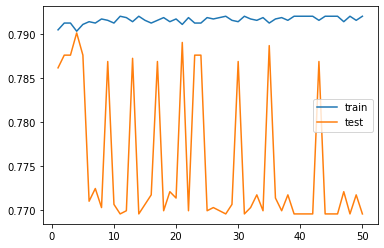

In [0]:
plt.plot(n_estimators, train_acc_est1, label='train')
plt.plot(n_estimators, test_acc_est1, label='test')
plt.legend()
plt.show

In [0]:
#estimators ++
train_acc_est2=[]
test_acc_est2=[]

for i in n_estimators:
    clf=RandomForestClassifier(n_estimators=i, max_depth=17, min_samples_leaf=1)
    clf.fit(X_train,y_train)
    train_acc_est2.append(clf.score(X_train,y_train))
    test_acc_est2.append(clf.score(X_test, y_test))

<function matplotlib.pyplot.show>

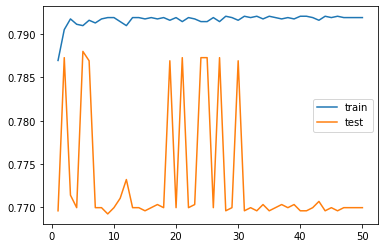

In [0]:
plt.plot(n_estimators, train_acc_est2, label='train')
plt.plot(n_estimators, test_acc_est2, label='test')
plt.legend()
plt.show

In [0]:
print('best accuracy: ', max(test_acc_est2))
est=n_estimators[test_acc_est2.index(max(test_acc_est2))]
print(est)

best accuracy:  0.7880101119537739
5


In [0]:
clf=RandomForestClassifier(n_estimators=est, max_depth=17, min_samples_leaf=1)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
print(score)

0.7703141928494042


In [0]:
#########################################################################################

In [0]:
#trying tree
from sklearn import tree
import matplotlib.pyplot as plt

max_depth=[i for i in range(1,31)]

train_acc_dep=[]
test_acc_dep=[]

for i in max_depth:
    dtree=tree.DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    train_acc_dep.append(dtree.score(X_train,y_train))
    test_acc_dep.append(dtree.score(X_test, y_test))

<function matplotlib.pyplot.show>

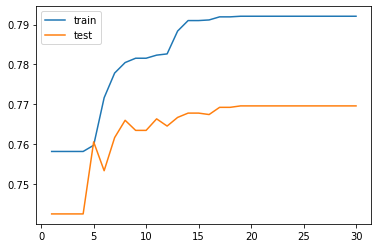

In [0]:
plt.plot(max_depth, train_acc_dep, label='train')
plt.plot(max_depth, test_acc_dep, label='test')
plt.legend()
plt.show

In [0]:
min_samples_leaf=[i for i in range(1,51)]

train_acc_node=[]
test_acc_node=[]
for i in min_samples_leaf:
    dtree=tree.DecisionTreeClassifier(min_samples_leaf=i)
    dtree.fit(X_train,y_train)
    train_acc_node.append(dtree.score(X_train,y_train))
    test_acc_node.append(dtree.score(X_test, y_test))

<function matplotlib.pyplot.show>

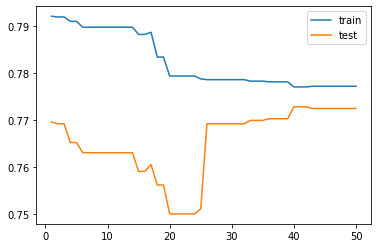

In [0]:
plt.plot(min_samples_leaf, train_acc_node, label='train')
plt.plot(min_samples_leaf, test_acc_node, label='test')
plt.legend()
plt.show

In [0]:
depth=max_depth[test_acc_dep.index(max(test_acc_dep))]
print('best accuracy: ', max(test_acc_dep))
print(depth)

best accuracy:  0.7695919104369808
19


In [0]:
nodes=min_samples_leaf[test_acc_node.index(max(test_acc_node))]
print('best accuracy: ', max(test_acc_node))
print(nodes)

best accuracy:  0.7728421812928855
40


In [0]:
gtree=tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=nodes)
gtree.fit(X_train,y_train)
#train_acc_node.append(dtree.score(X_train_set,y_train_set))
gtree.score(X_test, y_test)

0.7728421812928855

In [0]:
###############################################################################################

In [0]:
X_w=np.zeros((24,27)) #prediction array for white
X_n=np.zeros((24,27)) #prediction array for non-white
for i in range(3, 27):
  w=np.zeros(27)
  n=np.zeros(27)
  w[2]=1
  #n[2]=1
  w[0]=1
  n[0]=1
  w[1]=0
  n[1]=0
  w[i]=1
  n[i]=1
  X_w[i-3]=w
  X_n[i-3]=n

In [0]:
#yw=np.zeros(24)  #predictions (labels) for white
#yn=np.zeros(24) #predictions (labels) for non-white

yw=clf.predict(X_w)
yn=clf.predict(X_n)

In [0]:
print(yn)
print(yw)

[ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1]


In [0]:
tone=test.Skin_Tone.unique()
citizen=test.Citizenship_Status.unique()
sex=test.Sex.unique()

In [0]:
frame=pd.DataFrame(columns=['Charge', 'Skin_Tone', 'Citizenship_Status', 'Sex'])
numcharge=len(col)
newcol=[]
for i in col:
  for j in range(8):
    newcol.append(i)

#frame=pd.DataFrame(0, index=newcol, columns=['Skin_Tone', 'Citizenship_Status', 'Sex'])

for i in col:
  frame[i]=0

frame

,Charge,Skin_Tone,Citizenship_Status,Sex,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"


In [0]:
chargecol=[]
for i in col:
  for j in range(8):
    chargecol.append(i)

tonecol=[]
for i in range(len(col)):
  for j in tone: 
    for z in range(4):
      tonecol.append(j)

citizencol=[]
for i in range(len(col)):
  for u in range(2):
    for j in citizen: 
      for z in range(2):
        citizencol.append(j)

sexcol=[]
for i in range(len(col)):
  for u in range(2):
    for z in range(2):
      for j in sex: 
        sexcol.append(j)

In [0]:
frame['Charge']=chargecol
frame['Skin_Tone']=tonecol
frame['Citizenship_Status']=citizencol
frame['Sex']=sexcol
          

In [0]:
for i in range(len(frame)):
  frame[frame['Charge'][i]][i]=1

frame=frame.fillna(0)
frame

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Charge,Skin_Tone,Citizenship_Status,Sex,TERRORISTIC THREAT,CONTEMPT,POSSESSION OF WEAPON,DAMAGE PROPERTY,BURGLARY,THEFT,OBSTRUCTING,MARIJ,DISTRIBUTE,CONSPIRACY,MURDER,WITNESS TAMPERING,HINDERING-ONESELF,RESIST ARR,WANDERING/PROWLING TO OBTAIN/SELL CDS,CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDUCT,SEXUAL ASSAULT,DRUG,POSS CDS/ANALOG - SCHD I II III IV,POSS/SELL HYPODERMIC SYRINGE FOR USE WITH CDS,OPERATE MV DURING LICENSE SUSPENSION,ENDANGERING-SEXUAL CONDUCT WITH CHILD,SHOPLIFTING,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED"
0,TERRORISTIC THREAT,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TERRORISTIC THREAT,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TERRORISTIC THREAT,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TERRORISTIC THREAT,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TERRORISTIC THREAT,0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
189,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
frame1=frame.drop('Charge', axis=1)
X=frame1.values
frame.drop(col, axis=1, inplace=True )
frame['Skin_Tone']=frame['Skin_Tone'].replace(1, 'white')
frame['Skin_Tone']=frame['Skin_Tone'].replace(0, 'nonwhite')
frame['Citizenship_Status']=frame['Citizenship_Status'].replace(1, 'True')
frame['Citizenship_Status']=frame['Citizenship_Status'].replace(0, 'False')
frame['Sex']=frame['Sex'].replace(1, 'M')
frame['Sex']=frame['Sex'].replace(0, 'F')

In [0]:
frame

,Charge,Skin_Tone,Citizenship_Status,Sex
0,TERRORISTIC THREAT,white,True,M
1,TERRORISTIC THREAT,white,True,F
2,TERRORISTIC THREAT,white,False,M
3,TERRORISTIC THREAT,white,False,F
4,TERRORISTIC THREAT,nonwhite,True,M
...,...,...,...,...
187,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",white,False,F
188,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,True,M
189,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,True,F
190,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,False,M


In [0]:
yp=clf.predict(X)

In [0]:
frame['Prediction']=yp
frame['Prediction']=frame['Prediction'].replace(1, 'no bail')
frame['Prediction']=frame['Prediction'].replace(-1, 'bail')

In [0]:
frame

,Charge,Skin_Tone,Citizenship_Status,Sex,Prediction
0,TERRORISTIC THREAT,white,True,M,no bail
1,TERRORISTIC THREAT,white,True,F,no bail
2,TERRORISTIC THREAT,white,False,M,no bail
3,TERRORISTIC THREAT,white,False,F,no bail
4,TERRORISTIC THREAT,nonwhite,True,M,no bail
...,...,...,...,...,...
187,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",white,False,F,no bail
188,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,True,M,no bail
189,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,True,F,no bail
190,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,False,M,no bail


In [0]:
## ^^bail is -1 and no bail is 1
##the end :)

In [0]:
frame

,Charge,Skin_Tone,Citizenship_Status,Sex,Prediction
0,TERRORISTIC THREAT,white,True,M,no bail
1,TERRORISTIC THREAT,white,True,F,no bail
2,TERRORISTIC THREAT,white,False,M,no bail
3,TERRORISTIC THREAT,white,False,F,no bail
4,TERRORISTIC THREAT,nonwhite,True,M,no bail
...,...,...,...,...,...
187,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",white,False,F,no bail
188,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,True,M,no bail
189,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,True,F,no bail
190,"DRIVING WHILE LICENSE REFUSED, SUSPENDED, REVOKED",nonwhite,False,M,no bail


In [0]:
stats

,variable,% awarded bail,average bail,top 5 charges
0,White,0.329419,5589.950285,"[WITNESS TAMPERING, ENDANGERING-SEXUAL CONDUCT..."
1,Nonwhite,0.033087,333868.973684,[CRIMINAL ATTEMPT - PURPOSELY ENGAGES IN CONDU...
2,Male,0.235900,17124.710260,"[WITNESS TAMPERING, BURGLARY, OPERATE MV DURIN..."
3,Female,0.327425,1736.040484,"[MURDER, DISTRIBUTE, MARIJ, ENDANGERING-SEXUAL..."
4,Citizenship True,0.272051,6348.407793,"[OPERATE MV DURING LICENSE SUSPENSION, WITNESS..."
5,Citizenship False,0.235598,48082.483978,"[OPERATE MV DURING LICENSE SUSPENSION, MARIJ, ..."


In [0]:
cumulative

,Charges,Sex,Skin_Color,Citizenship_Status
0,TERRORISTIC THREAT,M,white,False
1,CONTEMPT,M,white,True
2,POSSESSION OF WEAPON,M,white,True
3,DAMAGE PROPERTY,M,white,True
4,BURGLARY,M,white,True
5,THEFT,M,white,True
6,OBSTRUCTING,M,white,True
7,MARIJ,M,nonwhite,True
8,DISTRIBUTE,M,nonwhite,True
9,CONSPIRACY,M,nonwhite,True


In [0]:
frame.to_pickle("./frame.pkl")
stats.to_pickle("./stats.pkl")
cumulative.to_pickle("./cumulative.pkl")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
